In [11]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv('data/co2_plp.csv')  # adapte le chemin si besoin

# Afficher les premières lignes
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/co2_plp.csv'

In [12]:
import os
print(os.listdir('data'))

FileNotFoundError: [Errno 2] No such file or directory: 'data'

In [14]:
import pandas as pd

df = pd.read_csv('co2_plp.csv')
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [16]:
df.isnull().sum()

,0
country,0
year,0
iso_code,7929
population,9172
gdp,34940
...,...
temperature_change_from_n2o,12131
total_ghg,12781
total_ghg_excluding_lucf,12955
trade_co2,45656


In [17]:
df = df.dropna(subset=['co2'])

In [18]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [19]:
df_model = df[['year', 'country', 'co2', 'population', 'gdp']]

In [20]:
df_model = df_model.dropna()

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_model['country_encoded'] = le.fit_transform(df_model['country'])

In [22]:
X = df_model[['year', 'population', 'gdp', 'country_encoded']]
y = df_model['co2']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn.linear_model import LinearRegression

# Créer le modèle
model = LinearRegression()

In [28]:
# Prédire les émissions de CO₂ sur les données de test
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("R² :", r2)

MSE : 46324.669598408684
R² : 0.8590482625091626


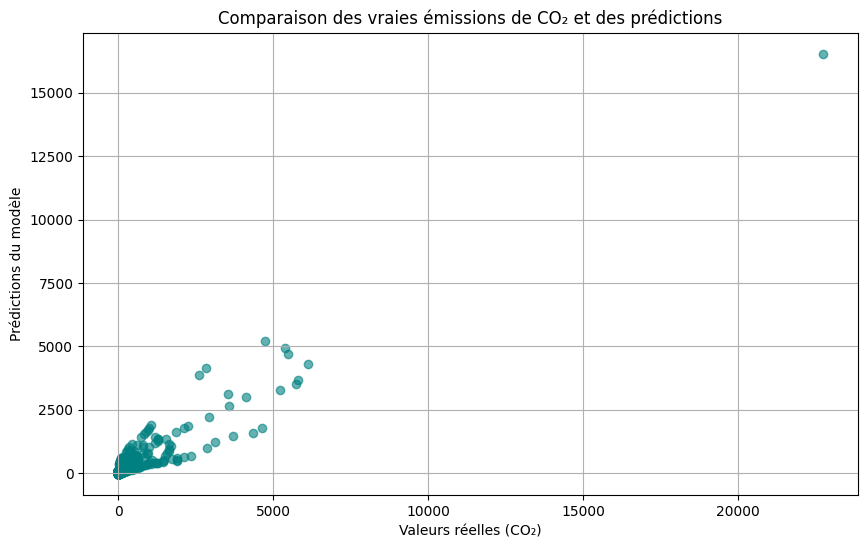

In [30]:
import matplotlib.pyplot as plt

# Tracer les vraies valeurs vs les prédictions
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Valeurs réelles (CO₂)")
plt.ylabel("Prédictions du modèle")
plt.title("Comparaison des vraies émissions de CO₂ et des prédictions")
plt.grid(True)
plt.show()

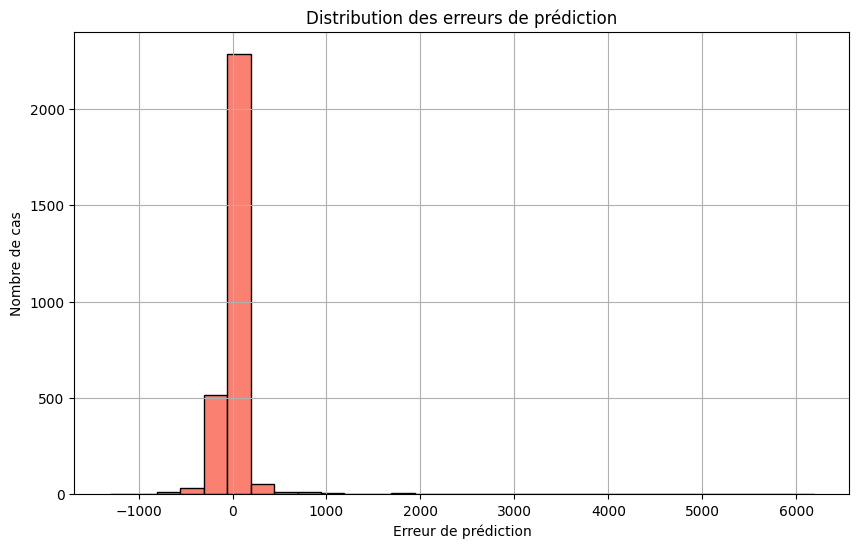

In [31]:
errors = y_test - y_pred

plt.figure(figsize=(10,6))
plt.hist(errors, bins=30, color='salmon', edgecolor='black')
plt.xlabel("Erreur de prédiction")
plt.ylabel("Nombre de cas")
plt.title("Distribution des erreurs de prédiction")
plt.grid(True)
plt.show()

In [32]:
import joblib

# Sauvegarder le modèle entraîné
joblib.dump(model, 'carbon_model.pkl')

['carbon_model.pkl']

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("R² :", r2)

MSE : 46324.669598408684
R² : 0.8590482625091626
